[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Tiger-Quant/demos2025/blob/master/september23.ipynb)

In [2]:
# ------------------------------------------------------------------
# Setup Cell: Run this first to install required libraries.
# ------------------------------------------------------------------
# The '!' command runs a shell command. We use it to call pip.
# The '-q' flag makes the output "quiet" to keep the notebook clean.

!pip install -q yfinance pandas matplotlib-venn numpy

print("✅ Setup complete. You can now run the rest of the notebook.")

✅ Setup complete. You can now run the rest of the notebook.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
data = yf.download('SPY', start='2022-01-01')
data.columns = data.columns.droplevel(1)
data

C:\Users\Evan Schreiner\AppData\Local\Temp\ipykernel_33520\1240473377.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('SPY', start='2022-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2022-01-03,453.210327,453.343161,449.548304,451.872636,72668200
2022-01-04,453.058624,455.364023,451.189655,454.642990,71178700
2022-01-05,444.358917,453.466583,444.264040,452.688630,104538900
2022-01-06,443.941406,446.673708,441.560124,443.893982,86858900
2022-01-07,442.186310,445.136827,440.820159,443.950934,85111600
...,...,...,...,...,...
2025-09-17,657.357544,659.890500,652.491031,658.185266,101952200
2025-09-18,660.429016,663.051750,658.444528,660.060044,90459200
2025-09-19,663.700012,664.549988,660.369995,662.330017,97945600


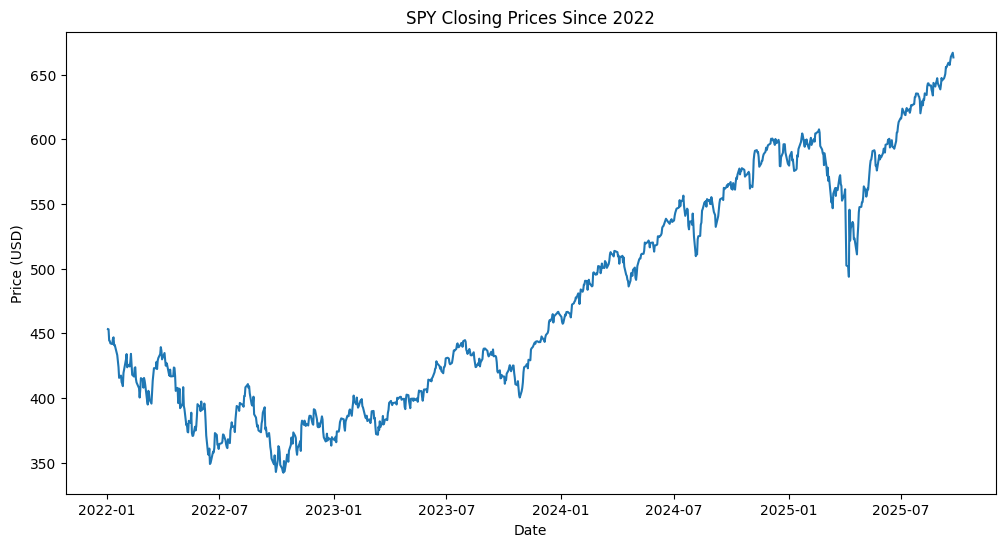

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='SPY Close Price')
plt.title('SPY Closing Prices Since 2022')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [6]:
data['SMA50'] = data['Close'].rolling(window=50).mean()
data

Price,Close,High,Low,Open,Volume,SMA50
Date,,,,,,
2022-01-03,453.210327,453.343161,449.548304,451.872636,72668200,NaN
2022-01-04,453.058624,455.364023,451.189655,454.642990,71178700,NaN
2022-01-05,444.358917,453.466583,444.264040,452.688630,104538900,NaN
2022-01-06,443.941406,446.673708,441.560124,443.893982,86858900,NaN
2022-01-07,442.186310,445.136827,440.820159,443.950934,85111600,NaN
...,...,...,...,...,...,...
2025-09-17,657.357544,659.890500,652.491031,658.185266,101952200,637.323658
2025-09-18,660.429016,663.051750,658.444528,660.060044,90459200,638.085547
2025-09-19,663.700012,664.549988,660.369995,662.330017,97945600,638.877751


In [7]:
data['Position'] = np.where(data['Close'] > data['SMA50'], 1, 0)
data

Price,Close,High,Low,Open,Volume,SMA50,Position
Date,,,,,,,
2022-01-03,453.210327,453.343161,449.548304,451.872636,72668200,NaN,0
2022-01-04,453.058624,455.364023,451.189655,454.642990,71178700,NaN,0
2022-01-05,444.358917,453.466583,444.264040,452.688630,104538900,NaN,0
2022-01-06,443.941406,446.673708,441.560124,443.893982,86858900,NaN,0
2022-01-07,442.186310,445.136827,440.820159,443.950934,85111600,NaN,0
...,...,...,...,...,...,...,...
2025-09-17,657.357544,659.890500,652.491031,658.185266,101952200,637.323658,1
2025-09-18,660.429016,663.051750,658.444528,660.060044,90459200,638.085547,1
2025-09-19,663.700012,664.549988,660.369995,662.330017,97945600,638.877751,1


In [8]:
data['Signal'] = data['Position'].diff()
data[data['Signal'] != 0].head()

Price,Close,High,Low,Open,Volume,SMA50,Position,Signal
Date,,,,,,,,
2022-01-03,453.210327,453.343161,449.548304,451.872636,72668200,NaN,0,NaN
2022-03-18,423.032715,423.356276,416.085595,416.827890,106345500,419.555732,1,1.0
2022-04-11,418.655090,423.489520,418.150711,422.642527,89770500,419.390389,0,-1.0
2022-04-13,421.881165,422.642482,416.675574,416.856392,74070400,419.038961,1,1.0
2022-04-14,416.628021,423.232556,416.523323,422.109573,97869500,418.693630,0,-1.0


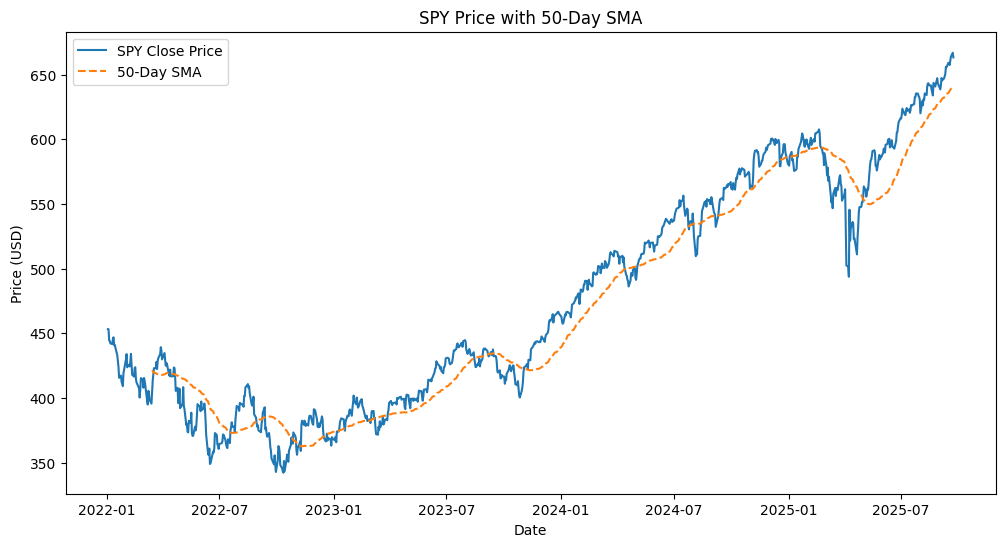

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='SPY Close Price')
plt.plot(data['SMA50'], label='50-Day SMA', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('SPY Price with 50-Day SMA')
plt.legend()
plt.show()

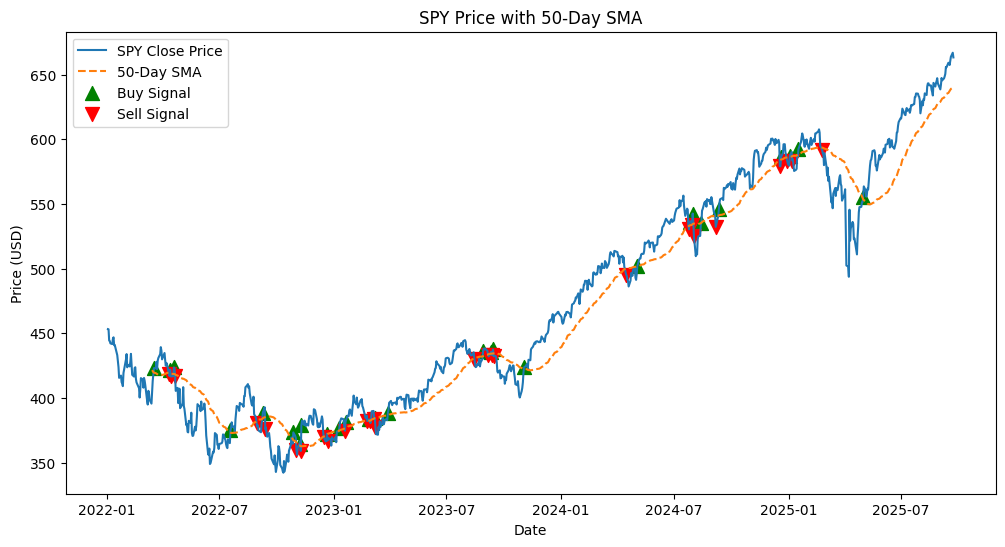

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='SPY Close Price')
plt.plot(data['SMA50'], label='50-Day SMA', linestyle='--')

plt.scatter(data.index[data['Signal'] == 1.0], 
            data['Close'][data['Signal'] == 1.0],
            label='Buy Signal', marker='^', color='green', s=100)

plt.scatter(data.index[data['Signal'] == -1.0], 
            data['Close'][data['Signal'] == -1.0],
            label='Sell Signal', marker='v', color='red', s=100)

plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('SPY Price with 50-Day SMA')
plt.legend()
plt.show()